# Caso: Estancia hospitalaria

## Enunciado del problema y caso práctico.

La hospitalización, o estancia hospitalaria, cuando es prolongada constituye una preocupación a nivel mundial debido a sus efectos negativos en el sistema de salud, aumentando los costos, generando deficiencia en la accesibilidad de prestación de servicios de salud, saturación de unidades de hospitalización y urgencias, por consiguiente, mayores efectos adversos como lo son las enfermedades intrahospitalarias.

El estudio de los procesos de atención en salud, así como el conocimiento de las características y perfiles de los usuarios con el objetivo de predecir la ocupación hospitalaria, es uno de los aspectos al que las autoridades de salud han prestado gran interés, pues permite no sólo garantizar los recursos necesarios para la atención del paciente, sino realizar ajustes respecto a la oferta y demanda de los servicios de salud y los implementos asociados.

## Objetivo a tener en cuenta.

Un importante Centro de Salud lo ha contratado con el fin de poder predecir si un paciente tendrá una estancia hospitalaria prolongada o no, utilizando la información contenida en el dataset asociado, la cual recaba una muestra histórica de sus pacientes, para poder administrar la demanda de camas en el hospital según la condición de los pacientes recientemente ingresados.

Para esto, se define que un paciente posee estancia hospitalaria prolongada si ha estado hospitalizado más de 8 días. Por lo que debe generar dicha variable categórica y luego categorizar los pacientes según las variables que usted considere necesarias, justificando dicha elección.

# Importar las librerias que se usarán

In [98]:
# Manipulación del DataFrame
import pandas as pd
import numpy as np

# Gráficas y visualización
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# Preprocesamiento
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# Procesamiento
from sklearn.ensemble import RandomForestClassifier

print('Librerias importadas !')

Librerias importadas !


# Carga y transformación de datos

## Visualización del dataset

### Creación de DataFrame

In [2]:
# Extraemos los datos de los datasets
data_train = pd.read_csv('hospitalizaciones_train.csv')
data_test = pd.read_csv('hospitalizaciones_test.csv')
print('DataFrames cargados !!!')

DataFrames cargados !!!


### Variables que poseen los DataFrames

In [3]:
# Vemos las columnas que tiene el dataset
data_train.columns

Index(['Available Extra Rooms in Hospital', 'Department', 'Ward_Facility_Code',
       'doctor_name', 'staff_available', 'patientid', 'Age', 'gender',
       'Type of Admission', 'Severity of Illness', 'health_conditions',
       'Visitors with Patient', 'Insurance', 'Admission_Deposit',
       'Stay (in days)'],
      dtype='object')

In [4]:
# Vemos las columnas que tiene el dataset
data_test.columns

Index(['Available Extra Rooms in Hospital', 'Department', 'Ward_Facility_Code',
       'doctor_name', 'staff_available', 'patientid', 'Age', 'gender',
       'Type of Admission', 'Severity of Illness', 'health_conditions',
       'Visitors with Patient', 'Insurance', 'Admission_Deposit'],
      dtype='object')

### Número de renglones y columas de los DataFrames

In [5]:
# Su numero de filas y columnas
data_train.shape

(410000, 15)

In [6]:
# Su numero de filas y columnas
data_test.shape

(90000, 14)

### Tipos de datos de cada variable de los DataFrames

* data_train()

In [7]:
# Tipo de variable que tenemos
data_train.dtypes

Available Extra Rooms in Hospital      int64
Department                            object
Ward_Facility_Code                    object
doctor_name                           object
staff_available                        int64
patientid                              int64
Age                                   object
gender                                object
Type of Admission                     object
Severity of Illness                   object
health_conditions                     object
Visitors with Patient                  int64
Insurance                             object
Admission_Deposit                    float64
Stay (in days)                         int64
dtype: object

* data_test()

In [8]:
# Tipo de variable que tenemos
data_test.dtypes

Available Extra Rooms in Hospital      int64
Department                            object
Ward_Facility_Code                    object
doctor_name                           object
staff_available                        int64
patientid                              int64
Age                                   object
gender                                object
Type of Admission                     object
Severity of Illness                   object
health_conditions                     object
Visitors with Patient                  int64
Insurance                             object
Admission_Deposit                    float64
dtype: object

### Gráfica de los valores nulos de los DataFrames

* data_train()

<AxesSubplot:>

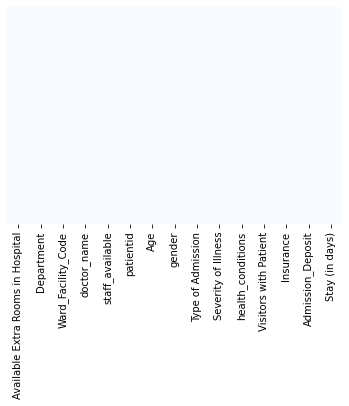

In [10]:
# Visualización de valores nulos en el DataFrame
sns.heatmap(data_train.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

Notamos que las columnas del **data_train** no poseen valores nulos.

* data_test()

<AxesSubplot:>

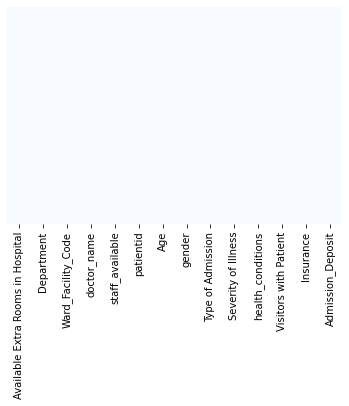

In [11]:
# Visualización de valores nulos en el DataFrame
sns.heatmap(data_test.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

Notamos que las columnas del **data_test** tampoco poseen valores nulos.

### Visualización más detallada de los DataFrames

* data_train()

In [12]:
data_train.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [13]:
data_train.tail()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
409995,1,gynecology,D,Dr Sarah,1,63105,31-40,Female,Trauma,Minor,Asthama,3,Yes,3902.291076,8
409996,5,gynecology,D,Dr Nathan,5,129292,21-30,Female,Trauma,Extreme,Other,4,No,4771.995223,9
409997,4,gynecology,D,Dr Sarah,9,11399,21-30,Female,Emergency,Minor,Asthama,4,Yes,3816.994210,9
409998,10,gynecology,D,Dr Olivia,10,75003,21-30,Female,Trauma,Moderate,Other,2,Yes,3841.577491,9
409999,3,gynecology,F,Dr Nathan,0,128183,41-50,Female,Trauma,Minor,Other,8,Yes,4329.046412,8


* data_test()

In [14]:
data_test.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
0,3,gynecology,F,Dr Olivia,10,2858,21-30,Female,Trauma,Moderate,Other,2,No,4749.640225
1,2,TB & Chest disease,E,Dr John,4,65657,51-60,Female,Trauma,Moderate,Asthama,2,Yes,4122.261324
2,2,radiotherapy,E,Dr John,7,45598,51-60,Other,Trauma,Moderate,None,3,No,5459.067882
3,2,gynecology,F,Dr Olivia,1,31132,21-30,Female,Trauma,Moderate,None,2,Yes,3987.033318
4,2,anesthesia,A,Dr John,7,125021,51-60,Female,Trauma,Extreme,Diabetes,2,No,4770.789695


In [15]:
data_test.tail()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit
89995,4,gynecology,F,Dr Sarah,2,43001,11-20,Female,Trauma,Minor,High Blood Pressure,3,No,4105.795901
89996,13,gynecology,F,Dr Olivia,8,85601,31-40,Female,Emergency,Moderate,Other,2,No,4631.550257
89997,2,gynecology,B,Dr Sarah,3,22447,11-20,Female,Emergency,Moderate,High Blood Pressure,2,No,5456.930075
89998,2,radiotherapy,A,Dr John,1,29957,61-70,Female,Trauma,Extreme,Diabetes,2,No,4694.127772
89999,3,gynecology,F,Dr Sophia,3,45008,41-50,Female,Trauma,Moderate,Heart disease,4,Yes,4713.868519


### Estadísticos

* data_train()

In [16]:
# Resumen global de estadisticos:
data_train.describe()

,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days)
count,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000,410000.000000
mean,3.639376,5.020946,63095.940020,3.552520,4723.419239,12.378193
std,2.701702,3.158018,41686.175937,2.247459,1047.420292,7.905618
min,0.000000,0.000000,-3146.000000,0.000000,1654.005148,3.000000
25%,2.000000,2.000000,25405.000000,2.000000,4072.638351,8.000000
50%,3.000000,5.000000,57736.000000,3.000000,4627.488745,9.000000
75%,4.000000,8.000000,103278.250000,4.000000,5092.349430,11.000000
max,24.000000,10.000000,134400.000000,32.000000,10104.726390,51.000000


* data_test()

In [17]:
# Resumen global de estadisticos:
data_test.describe()

,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,3.636178,5.018300,63399.156900,3.535267,4717.288655
std,2.681778,3.158507,41703.856053,2.211598,1046.877545
min,0.000000,0.000000,-3269.000000,0.000000,1710.212495
25%,2.000000,2.000000,25633.000000,2.000000,4067.375540
50%,3.000000,5.000000,58469.000000,3.000000,4624.372449
75%,4.000000,8.000000,103812.500000,4.000000,5088.489369
max,24.000000,10.000000,134037.000000,32.000000,9872.650668


A simple vista se observa que puede haber algunos outliers en las columnas 'Available Extra Rooms in Hospital' y 'Visitors with Patient' que se analizarán más adelante.

### Análisis rápido de las categorías usando un histograma.

* data_train()

array([[<AxesSubplot:title={'center':'Available Extra Rooms in Hospital'}>,
        <AxesSubplot:title={'center':'staff_available'}>],
       [<AxesSubplot:title={'center':'patientid'}>,
        <AxesSubplot:title={'center':'Visitors with Patient'}>],
       [<AxesSubplot:title={'center':'Admission_Deposit'}>,
        <AxesSubplot:title={'center':'Stay (in days)'}>]], dtype=object)

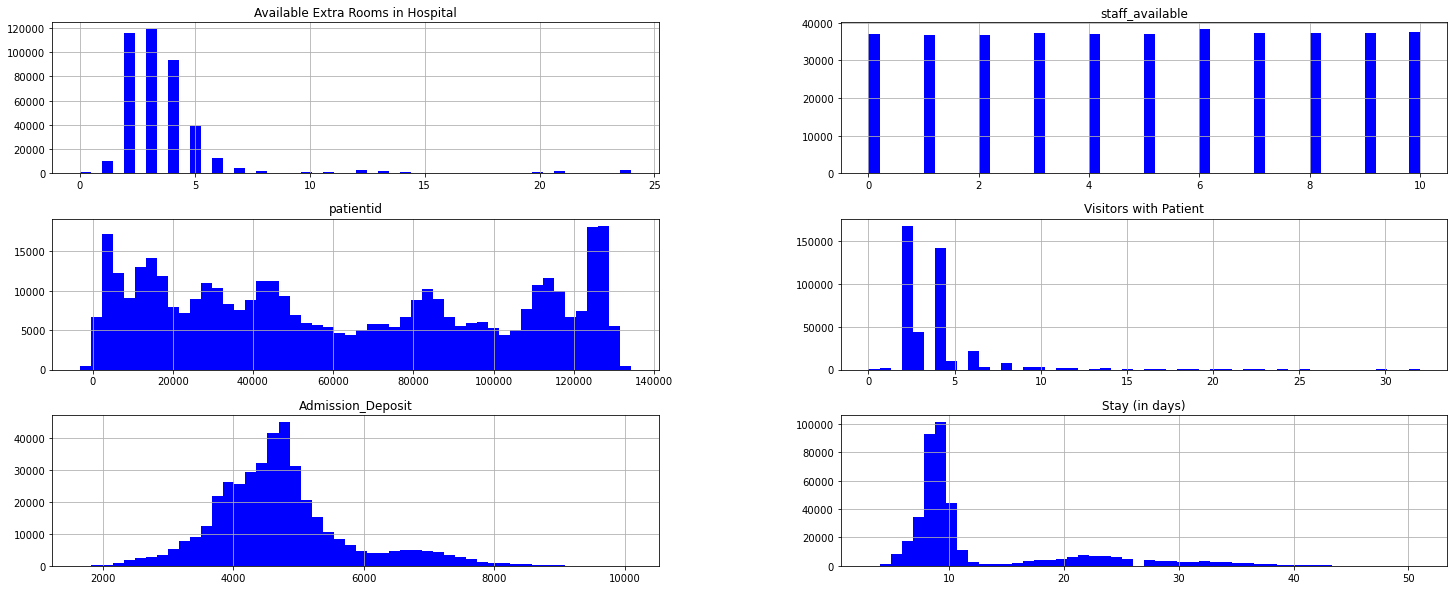

In [18]:
data_train.hist(bins = 50, figsize = (25,10), color = 'b')

* data_test()

array([[<AxesSubplot:title={'center':'Available Extra Rooms in Hospital'}>,
        <AxesSubplot:title={'center':'staff_available'}>],
       [<AxesSubplot:title={'center':'patientid'}>,
        <AxesSubplot:title={'center':'Visitors with Patient'}>],
       [<AxesSubplot:title={'center':'Admission_Deposit'}>,
        <AxesSubplot:>]], dtype=object)

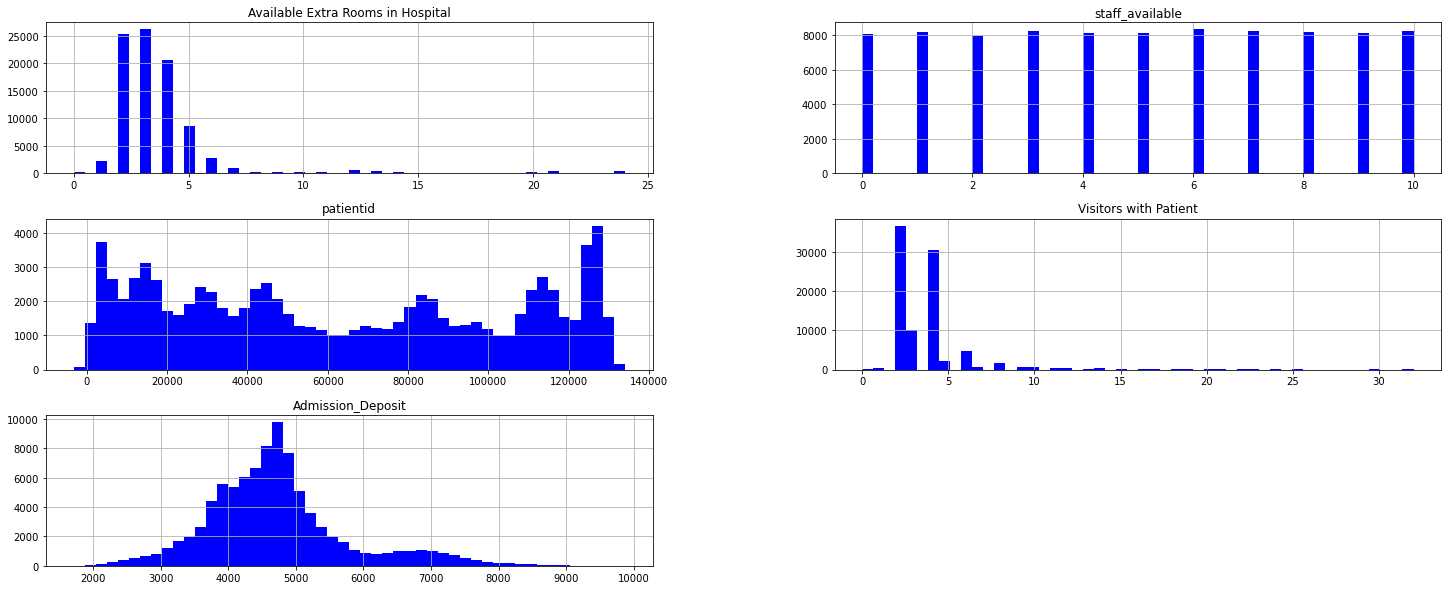

In [19]:
data_test.hist(bins = 50, figsize = (25,10), color = 'b')

Observamos que para:

**Available Extra Rooms in Hospital**: Hay una distribución sesgada a la izquierda, que indica que que la mayoría de las veces siempre hay 4 habitaciones adicionales disponibles en el hospital.

**staff_available**: En el hospital hay desde 0 hasta 10 personas del staff disponibles al momento del ingreso del paciente.

**patientid**: Es un ID y para este analisis no servira de mucho así que se eliminará.

**Visitors with Patient**: La cantidad de personas que visitarón al paciente no es una variable que nos diga algo sobre el problema que se está analizando, así que se eliminará.

**Admission_Deposit**: En promedio se pagan aproximadamente $5000 a nombre del paciente, con el fin de cubrir los costos iniciales de internación. 

**Stay (in days)**: Esta será nuestra columna objetivo, se analizará más adelante.

### Matriz de correlación.

* data_train()

<AxesSubplot:>

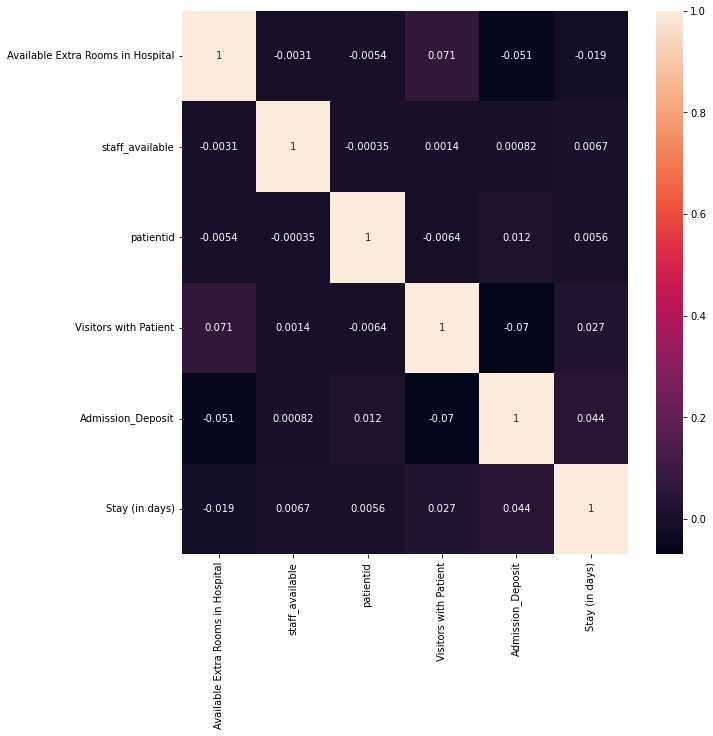

In [21]:
correlations = data_train.corr()
f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(correlations, annot = True)

* data_test()

<AxesSubplot:>

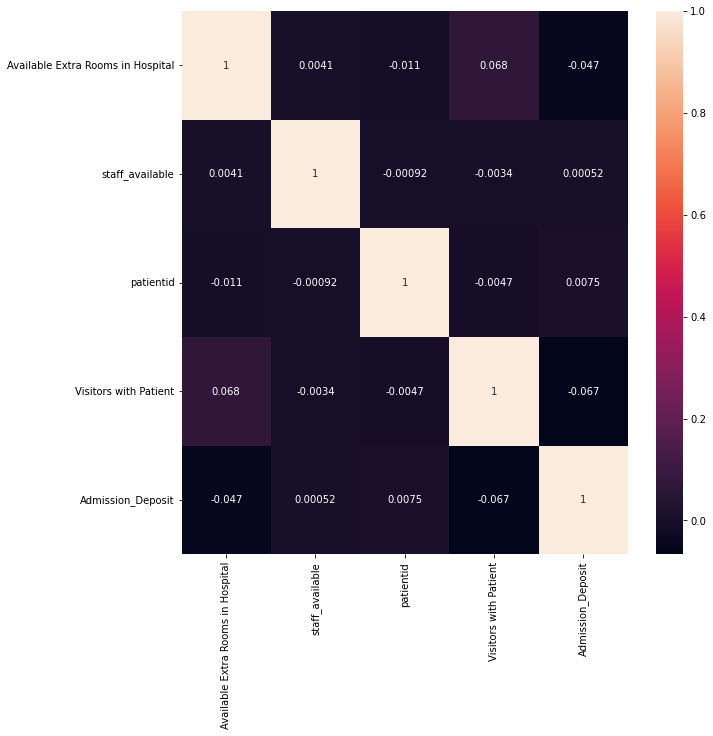

In [22]:
correlations = data_test.corr()
f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(correlations, annot = True)

Observamos que las columnas ('Available Extra Rooms in Hospital', 'staff_available', 'patientid', 'Visitors with Patient', 'Admission_Deposit' y 'Stay (in days)') no estan correlacionadas.

## Análisis de la columna: "Stay (in days)"

Como se nos pide clasificar las estadías en cortas (menor o igual a 8 días) y largas (mayor a 8 días) tomando como referencia 8 días, lo primero que haremos será cambiar a binario la columna 'Stay (in days)'.

In [23]:
# DataFrame antes de efectuar los cambios
data_train[['Stay (in days)']].head()

,Stay (in days)
0,8
1,9
2,7
3,8
4,34


In [24]:
# Estadías cortas (menor o igual a 8 días) = 0 y estadías largas (mayor a 8 días) = 1
data_train['Stay (in days)'] = data_train['Stay (in days)'].apply(lambda x: 0 if x <= 8 else 1)
# DataFrame despues de efectuar los cambios
data_train[['Stay (in days)']].head()

,Stay (in days)
0,0
1,1
2,0
3,0
4,1


## Análisis de la columna: "Ward_Facility_Code"

Conocer el código de la habitación del paciente, no es tan relevante para saber si se quedará por más tiempo en el hospital ya que para esto tenemos más información en otras columnas. Se eliminará esta columna.

In [25]:
# Eliminamos del DataFrame
data_train.drop(['Ward_Facility_Code'], axis=1, inplace=True)
print(data_train.columns)
print(data_train.shape)

Index(['Available Extra Rooms in Hospital', 'Department', 'doctor_name',
       'staff_available', 'patientid', 'Age', 'gender', 'Type of Admission',
       'Severity of Illness', 'health_conditions', 'Visitors with Patient',
       'Insurance', 'Admission_Deposit', 'Stay (in days)'],
      dtype='object')
(410000, 14)


In [26]:
# Eliminamos del DataFrame
data_test.drop(['Ward_Facility_Code'], axis=1, inplace=True)
print(data_test.columns)
print(data_test.shape)

Index(['Available Extra Rooms in Hospital', 'Department', 'doctor_name',
       'staff_available', 'patientid', 'Age', 'gender', 'Type of Admission',
       'Severity of Illness', 'health_conditions', 'Visitors with Patient',
       'Insurance', 'Admission_Deposit'],
      dtype='object')
(90000, 13)


## Análisis de la columna: "doctor_name"

Un doctor tiene entre varios objetivos curar a su paciente de la manera más óptima posible, así que se asume que no depende de él, sino de la gravedad de la herida que esté más tiempo en el hospital (esta información ya está registrada en la columna 'Severity of Illness'), por lo tanto se eliminará esta columna.

In [27]:
# Eliminamos del DataFrame
data_train.drop(['doctor_name'], axis=1, inplace=True)
print(data_train.columns)
print(data_train.shape)

Index(['Available Extra Rooms in Hospital', 'Department', 'staff_available',
       'patientid', 'Age', 'gender', 'Type of Admission',
       'Severity of Illness', 'health_conditions', 'Visitors with Patient',
       'Insurance', 'Admission_Deposit', 'Stay (in days)'],
      dtype='object')
(410000, 13)


In [28]:
# Eliminamos del DataFrame
data_test.drop(['doctor_name'], axis=1, inplace=True)
print(data_test.columns)
print(data_test.shape)

Index(['Available Extra Rooms in Hospital', 'Department', 'staff_available',
       'patientid', 'Age', 'gender', 'Type of Admission',
       'Severity of Illness', 'health_conditions', 'Visitors with Patient',
       'Insurance', 'Admission_Deposit'],
      dtype='object')
(90000, 12)


## Análisis de la columna: "patientid"

Es un ID y para este analisis no servira de mucho así que se eliminará.

In [29]:
# Eliminamos del DataFrame
data_train.drop(['patientid'], axis=1, inplace=True)
print(data_train.columns)
print(data_train.shape)

Index(['Available Extra Rooms in Hospital', 'Department', 'staff_available',
       'Age', 'gender', 'Type of Admission', 'Severity of Illness',
       'health_conditions', 'Visitors with Patient', 'Insurance',
       'Admission_Deposit', 'Stay (in days)'],
      dtype='object')
(410000, 12)


In [30]:
# Eliminamos del DataFrame
data_test.drop(['patientid'], axis=1, inplace=True)
print(data_test.columns)
print(data_test.shape)

Index(['Available Extra Rooms in Hospital', 'Department', 'staff_available',
       'Age', 'gender', 'Type of Admission', 'Severity of Illness',
       'health_conditions', 'Visitors with Patient', 'Insurance',
       'Admission_Deposit'],
      dtype='object')
(90000, 11)


## Análisis de la columna: "Visitors with Patient"

La cantidad de personas que visitarón al paciente no es una variable que nos diga algo sobre el problema que se está analizando, así que se eliminará.

In [31]:
# Eliminamos del DataFrame
data_train.drop(['Visitors with Patient'], axis=1, inplace=True)
print(data_train.columns)
print(data_train.shape)

Index(['Available Extra Rooms in Hospital', 'Department', 'staff_available',
       'Age', 'gender', 'Type of Admission', 'Severity of Illness',
       'health_conditions', 'Insurance', 'Admission_Deposit',
       'Stay (in days)'],
      dtype='object')
(410000, 11)


In [32]:
# Eliminamos del DataFrame
data_test.drop(['Visitors with Patient'], axis=1, inplace=True)
print(data_test.columns)
print(data_test.shape)

Index(['Available Extra Rooms in Hospital', 'Department', 'staff_available',
       'Age', 'gender', 'Type of Admission', 'Severity of Illness',
       'health_conditions', 'Insurance', 'Admission_Deposit'],
      dtype='object')
(90000, 10)


## Análisis de las columnas: "Department" - "Age" - "gender" - "Type of Admission" - "Severity of Illness" - "health_conditions" - "Insurance"

Ya que estas columnas poseen diferentes categorias con información relevante, lo primero que haremos es mostrar el tipo de categorias (valores únicos) de cada columna para saber con que estaremos trabajando y despues las transformaremos de variables tipo **object** a tipo **category** para usarlas en nuestro modelo.

In [33]:
# Valores unicos en la columna 'Department'
print(data_train['Department'].unique())
print(data_test['Department'].unique())

['gynecology' 'anesthesia' 'TB & Chest disease' 'radiotherapy' 'surgery']
['gynecology' 'TB & Chest disease' 'radiotherapy' 'anesthesia' 'surgery']


In [34]:
# Valores unicos en la columna 'Age'
print(data_train['Age'].unique())
print(data_test['Age'].unique())

['41-50' '31-40' '21-30' '71-80' '11-20' '51-60' '61-70' '81-90' '91-100'
 '0-10']
['21-30' '51-60' '71-80' '41-50' '31-40' '0-10' '61-70' '11-20' '81-90'
 '91-100']


In [35]:
# Valores unicos en la columna 'gender'
print(data_train['gender'].unique())
print(data_test['gender'].unique())

['Female' 'Male' 'Other']
['Female' 'Other' 'Male']


In [36]:
# Valores unicos en la columna 'Type of Admission'
print(data_train['Type of Admission'].unique())
print(data_test['Type of Admission'].unique())

['Trauma' 'Urgent' 'Emergency']
['Trauma' 'Urgent' 'Emergency']


In [37]:
# Valores unicos en la columna 'Severity of Illness'
print(data_train['Severity of Illness'].unique())
print(data_test['Severity of Illness'].unique())

['Extreme' 'Minor' 'Moderate']
['Moderate' 'Extreme' 'Minor']


In [38]:
# Valores unicos en la columna 'health_conditions'
print(data_train['health_conditions'].unique())
print(data_test['health_conditions'].unique())

['Diabetes' 'Heart disease' 'None' 'Other' 'Asthama' 'High Blood Pressure']
['Other' 'Asthama' 'None' 'Diabetes' 'Heart disease' 'High Blood Pressure']


In [39]:
# Valores unicos en la columna 'Insurance'
print(data_train['Insurance'].unique())
print(data_test['Insurance'].unique())

['Yes' 'No']
['No' 'Yes']


In [40]:
# Transformación a variables categoricas
data_train[["Department","Age","gender","Type of Admission",
      "Severity of Illness","health_conditions","Insurance"]] = data_train[["Department","Age","gender","Type of Admission",
                                                                      "Severity of Illness","health_conditions","Insurance"]].astype('category')
data_train.dtypes

Available Extra Rooms in Hospital       int64
Department                           category
staff_available                         int64
Age                                  category
gender                               category
Type of Admission                    category
Severity of Illness                  category
health_conditions                    category
Insurance                            category
Admission_Deposit                     float64
Stay (in days)                          int64
dtype: object

In [42]:
# Transformación a variables categoricas
data_test[["Department","Age","gender","Type of Admission",
      "Severity of Illness","health_conditions","Insurance"]] = data_test[["Department","Age","gender","Type of Admission",
                                                                      "Severity of Illness","health_conditions","Insurance"]].astype('category')
data_test.dtypes

Available Extra Rooms in Hospital       int64
Department                           category
staff_available                         int64
Age                                  category
gender                               category
Type of Admission                    category
Severity of Illness                  category
health_conditions                    category
Insurance                            category
Admission_Deposit                     float64
dtype: object

## Guardar CSV (BORRAR)

In [43]:
data_train.to_csv('DataFrame_clean_train.csv', index=False)
data_test.to_csv('DataFrame_clean_test.csv', index=False)
print('ok borrar')

ok borrar


In [44]:
data_train = pd.read_csv('DataFrame_clean_train.csv')
data_test = pd.read_csv('DataFrame_clean_test.csv')

In [45]:
data_train

,Available Extra Rooms in Hospital,Department,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,0,41-50,Female,Trauma,Extreme,Diabetes,Yes,2966.408696,0
1,4,gynecology,2,31-40,Female,Trauma,Minor,Heart disease,No,3554.835677,1
2,2,gynecology,8,21-30,Female,Trauma,Extreme,Diabetes,Yes,5624.733654,0
3,4,gynecology,7,31-40,Female,Urgent,Moderate,None,No,4814.149231,0
4,2,anesthesia,10,71-80,Male,Trauma,Moderate,Diabetes,No,5169.269637,1
...,...,...,...,...,...,...,...,...,...,...,...
409995,1,gynecology,1,31-40,Female,Trauma,Minor,Asthama,Yes,3902.291076,0
409996,5,gynecology,5,21-30,Female,Trauma,Extreme,Other,No,4771.995223,1
409997,4,gynecology,9,21-30,Female,Emergency,Minor,Asthama,Yes,3816.994210,1
409998,10,gynecology,10,21-30,Female,Trauma,Moderate,Other,Yes,3841.577491,1


In [46]:
data_test

,Available Extra Rooms in Hospital,Department,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Admission_Deposit
0,3,gynecology,10,21-30,Female,Trauma,Moderate,Other,No,4749.640225
1,2,TB & Chest disease,4,51-60,Female,Trauma,Moderate,Asthama,Yes,4122.261324
2,2,radiotherapy,7,51-60,Other,Trauma,Moderate,None,No,5459.067882
3,2,gynecology,1,21-30,Female,Trauma,Moderate,None,Yes,3987.033318
4,2,anesthesia,7,51-60,Female,Trauma,Extreme,Diabetes,No,4770.789695
...,...,...,...,...,...,...,...,...,...,...
89995,4,gynecology,2,11-20,Female,Trauma,Minor,High Blood Pressure,No,4105.795901
89996,13,gynecology,8,31-40,Female,Emergency,Moderate,Other,No,4631.550257
89997,2,gynecology,3,11-20,Female,Emergency,Moderate,High Blood Pressure,No,5456.930075
89998,2,radiotherapy,1,61-70,Female,Trauma,Extreme,Diabetes,No,4694.127772


# Preprocesamiento de datos.

Una ves limpio el DataFrame, el siguiente paso es dejar las variables listas para poder usarlas en un modelo de Machine Learning.

## Codificación de variables categóricas.

La variable categórica, a diferencia de las variables cardinales o continuas (que permiten cálculos numéricos), clasifica a los individuos o casos. Normalmente toman valores representados por números enteros, como el uno o el cero, pero estos son solo eso, representaciones.

* data_train()

In [47]:
# Variables categoricas (en Dtype: category)
X_cat_train = data_train[['Department', 'Age', 'gender', 'Type of Admission', 'Severity of Illness', 'health_conditions', 'Insurance']]
X_cat_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Department           410000 non-null  object
 1   Age                  410000 non-null  object
 2   gender               410000 non-null  object
 3   Type of Admission    410000 non-null  object
 4   Severity of Illness  410000 non-null  object
 5   health_conditions    410000 non-null  object
 6   Insurance            410000 non-null  object
dtypes: object(7)
memory usage: 21.9+ MB


In [52]:
# Creamos un objeto OneHotEncoder:
codificador_train = OneHotEncoder()
# Transformamos las variables categoricas a númericas:
codificacion_train = codificador_train.fit(X_cat_train)
# Obtenemos el nombre de cada columna que se va a crear
nombres_columnas_train = np.array([item for lista in codificador_train.categories_ for item in lista])
# Creamos un array con las categorias codificadas
X_cat_cod_train = codificacion_train.transform(X_cat_train).toarray()
# Checamos su tamaño:
X_cat_cod_train.shape

(410000, 32)

* data_test()

In [48]:
# Variables categoricas (en Dtype: category)
X_cat_test = data_test[['Department', 'Age', 'gender', 'Type of Admission', 'Severity of Illness', 'health_conditions', 'Insurance']]
X_cat_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Department           90000 non-null  object
 1   Age                  90000 non-null  object
 2   gender               90000 non-null  object
 3   Type of Admission    90000 non-null  object
 4   Severity of Illness  90000 non-null  object
 5   health_conditions    90000 non-null  object
 6   Insurance            90000 non-null  object
dtypes: object(7)
memory usage: 4.8+ MB


In [53]:
# Creamos un objeto OneHotEncoder:
codificador_test = OneHotEncoder()
# Transformamos las variables categoricas a númericas:
codificacion_test = codificador_test.fit(X_cat_test)
# Obtenemos el nombre de cada columna que se va a crear
nombres_columnas_test = np.array([item for lista in codificador_test.categories_ for item in lista])
# Creamos un array con las categorias codificadas
X_cat_cod_test = codificacion_test.transform(X_cat_test).toarray()
# Checamos su tamaño:
X_cat_cod_test.shape

(90000, 32)

Observamos que esta transformación siempre incrementa nuesto número de columnas, en este caso de 7 a 32.

Pasamos las variables **X_cat_cod_train** y **X_cat_cod_test** a DataFrame:

In [54]:
# Creamos el DataFrame
X_cat_train = pd.DataFrame(X_cat_cod_train, columns=nombres_columnas_train)
X_cat_train

,TB & Chest disease,anesthesia,gynecology,radiotherapy,surgery,0-10,11-20,21-30,31-40,41-50,...,Minor,Moderate,Asthama,Diabetes,Heart disease,High Blood Pressure,None,Other,No,Yes
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
409996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
409997,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
409998,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [55]:
# Creamos el DataFrame
X_cat_test = pd.DataFrame(X_cat_cod_test, columns=nombres_columnas_test)
X_cat_test

,TB & Chest disease,anesthesia,gynecology,radiotherapy,surgery,0-10,11-20,21-30,31-40,41-50,...,Minor,Moderate,Asthama,Diabetes,Heart disease,High Blood Pressure,None,Other,No,Yes
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
89996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
89997,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
89998,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Variables numéricas a utilizar en el modelo.

Aquí creamos un DataFrame que contenga solo variables numéricas de las columnas 'Available Extra Rooms in Hospital', 'staff_available' y 'Admission_Deposit' (no incluye a nuestra columna **Stay (in days)**, ya que esta es la columna objetivo). 

* data_train()

In [57]:
# Notemos que hemos elminado la columna objetivo: 'Stay (in days)'.
X_numerical_train = data_train[['Available Extra Rooms in Hospital', 'staff_available', 'Admission_Deposit']]
X_numerical_train

,Available Extra Rooms in Hospital,staff_available,Admission_Deposit
0,4,0,2966.408696
1,4,2,3554.835677
2,2,8,5624.733654
3,4,7,4814.149231
4,2,10,5169.269637
...,...,...,...
409995,1,1,3902.291076
409996,5,5,4771.995223
409997,4,9,3816.994210
409998,10,10,3841.577491


* data_test()

In [58]:
# Notemos que hemos elminado la columna objetivo: 'Stay (in days)'.
X_numerical_test = data_test[['Available Extra Rooms in Hospital', 'staff_available', 'Admission_Deposit']]
X_numerical_test

,Available Extra Rooms in Hospital,staff_available,Admission_Deposit
0,3,10,4749.640225
1,2,4,4122.261324
2,2,7,5459.067882
3,2,1,3987.033318
4,2,7,4770.789695
...,...,...,...
89995,4,2,4105.795901
89996,13,8,4631.550257
89997,2,3,5456.930075
89998,2,1,4694.127772


## Escalado de datos.

Como tenémos dos DataFrame, **X_cat** y **X_numerical**. Tenemos que unirlos para poder trabajarlos como uno solo (para train y test) y asi poder escalarlo.

* data_train()

In [67]:
# Concatenamos ambos DataFrame para tener uno solo relacionado:
X_all_train = pd.concat([X_cat_train, X_numerical_train], axis = 1)
X_all_train

,TB & Chest disease,anesthesia,gynecology,radiotherapy,surgery,0-10,11-20,21-30,31-40,41-50,...,Diabetes,Heart disease,High Blood Pressure,None,Other,No,Yes,Available Extra Rooms in Hospital,staff_available,Admission_Deposit
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4,0,2966.408696
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4,2,3554.835677
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,8,5624.733654
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4,7,4814.149231
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2,10,5169.269637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,3902.291076
409996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,5,5,4771.995223
409997,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,9,3816.994210
409998,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,10,10,3841.577491


* data_test()

In [68]:
# Concatenamos ambos DataFrame para tener uno solo relacionado:
X_all_test = pd.concat([X_cat_test, X_numerical_test], axis = 1)
X_all_test

,TB & Chest disease,anesthesia,gynecology,radiotherapy,surgery,0-10,11-20,21-30,31-40,41-50,...,Diabetes,Heart disease,High Blood Pressure,None,Other,No,Yes,Available Extra Rooms in Hospital,staff_available,Admission_Deposit
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3,10,4749.640225
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,4,4122.261324
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2,7,5459.067882
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2,1,3987.033318
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2,7,4770.789695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4,2,4105.795901
89996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,13,8,4631.550257
89997,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2,3,5456.930075
89998,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2,1,4694.127772


In [69]:
# Unimos amboas DataFrames
X_all = pd.concat([X_all_train, X_all_test], axis = 0)
X_all

,TB & Chest disease,anesthesia,gynecology,radiotherapy,surgery,0-10,11-20,21-30,31-40,41-50,...,Diabetes,Heart disease,High Blood Pressure,None,Other,No,Yes,Available Extra Rooms in Hospital,staff_available,Admission_Deposit
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4,0,2966.408696
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4,2,3554.835677
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,8,5624.733654
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4,7,4814.149231
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2,10,5169.269637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4,2,4105.795901
89996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,13,8,4631.550257
89997,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2,3,5456.930075
89998,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2,1,4694.127772


El escalado va a transformar los valores de las variables de forma que estén confinados en un rango $[a, b]$, típicamente $[0, 1]$ o $[-1, 1]$. Esto ayuda a que los modelos de **Machine Learning** usen todos los datos de manera uniforme y no haya sesgos hacia una variable debido a su tamaño con respecto a otra.

Para realizar esto, utilizaremos la libreria de **sklearn** que nos da acceso a una función llamada **MinMaxScaler** que escalará los datos.

In [70]:
# Creamos un objeto de MinMaxScaler:
scaler = MinMaxScaler()
# Ingresamos el DataFrame
scaler.fit(X_all)
# Transformamos las variables escaladas:
X = scaler.transform(X_all)
X

array([[0.        , 0.        , 1.        , ..., 0.16666667, 0.        ,
        0.15530077],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.2       ,
        0.22493116],
       [0.        , 0.        , 1.        , ..., 0.08333333, 0.8       ,
        0.46986859],
       ...,
       [0.        , 0.        , 1.        , ..., 0.08333333, 0.3       ,
        0.45001188],
       [0.        , 0.        , 0.        , ..., 0.08333333, 0.1       ,
        0.35974712],
       [0.        , 0.        , 1.        , ..., 0.125     , 0.3       ,
        0.3620831 ]])

## Vector de predicciones (objetivo)

Este es el vector que usarémos para entrenar nuestro modelo de Machine Learning

In [95]:
# Variable dependiente
y_train = data_train['Stay (in days)']
y_train

0         0
1         1
2         0
3         0
4         1
         ..
409995    0
409996    1
409997    1
409998    1
409999    0
Name: Stay (in days), Length: 410000, dtype: int64

# Procesamiento de datos

## Set de entrenamiento y de prueba.

Lo primero que haremos será dividir el conjunto de entrenamiento como venia en los archivos proporcionados. Despues haremos las predicción.


In [96]:
# Variables de entrenamiento y prueba
X_train, X_test = X[:410000], X[410000:]
X_train.shape, X_test.shape

((410000, 35), (90000, 35))

## Bosques aleatorios.

Utilizaremos la libreria de **sklearn.ensemble** que nos da acceso a una función llamada **RandomForestClassifier** para usar la clasificación por bosques aleatorios.

In [103]:
# Creamos un objeto de RandomForestClassifier:
model_rf = RandomForestClassifier(n_jobs=-1)

# Cremos el modelo para predecir uasando los datos de entrenamiento:
model_rf.fit(X_train, y_train)

# Hacemos la prediccion:
y_pred = model_rf.predict(X_test)

# Creamos un DataFrame con las predicciones:
pred = pd.DataFrame(y_pred, columns=[['pred']])

# Guardamos la prediccion:
pred.to_csv('JozCrzBrgn.csv', index=False)

print('El modelo ha sido guardado!!!')

El modelo ha sido guardado!!!
